In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

In [2]:
def read_log(_in):
    sacs = []
    snames = []
    pidents = []
    qstarts = []
    qends = []
    with open(_in) as f:
        for line in f:
            row = line.split('\t')
            attrs = row[1].split("|")
            sacs.append(attrs[0])
            snames.append(attrs[1])
            pidents.append(float(row[2]))
            qstarts.append(int(re.findall(r'\d*\.\.\d*', row[0])[0].split('..')[0]))
            qends.append(int(re.findall(r'\d*\.\.\d*', row[0])[0].split('..')[1]))
    return sacs, snames, pidents, qstarts, qends 


sacs, snames, pidents, qstarts, qends = read_log('/home/zeng/python_work/bioinfo/nCov/task/log-s-4000-3-100')

X = np.array(list(zip(qstarts, qends, pidents)))
y = np.array(snames)

In [4]:
X, y

(array([[1604.   , 1696.   ,   91.304],
        [3098.   , 3126.   ,   96.552],
        [1497.   , 1527.   ,   96.296],
        ...,
        [3385.   , 3417.   ,  100.   ],
        [2526.   , 2584.   ,   89.831],
        [3045.   , 3116.   ,   97.222]]),
 array(['RaTG13', 'UNKNOWN_HW364301', 'BtKY72', ..., 'RaTG13', 'Rs4255',
        'RaTG13'], dtype='<U47'))

In [7]:
from collections import Counter

def judge_in_window(window, chip):
    return False if chip[1]<=window[0] or chip[0]>=window[1] else True

def in_window(window, X, y):
    results = []
    for row in zip(X, y):
        chip = row[0][0:2]
        if judge_in_window(window, chip):
            results.append(list(row))
    return results

window_size = 25
winners = []
for i in range(3822-window_size):
    window = (i, i+window_size)
    chips_in = in_window(window, X,  y)
    if chips_in:
        contr = Counter(list(zip(*chips_in))[1])
        winner = contr.most_common(1)[0][0]
        prob = contr.most_common(1)[0][1] / sum(contr.values())
        # print(winner, prob)
        winners.append((winner, prob))
    else:
        continue



In [11]:
winners = list(map(lambda x: x.upper() , list(zip(*winners))[0]))

In [13]:
set(winners)

{'BTKY72', 'RATG13', 'YNLF_34C'}

In [272]:
wins = list(zip(*winners))[0]
a_s, b_s, c_s, d_s = [],[],[],[]
for i, win in enumerate(wins):
    if win == 'RaTG13' or win == 'Ratg13':
        a_s.append(i)
    elif win == 'BtKY72':
        b_s.append(i)
    elif win == 'YNLF_34C':
        c_s.append(i)


In [273]:
a_s[0], a_s[-1], b_s[0], b_s[-1], c_s[0], c_s[-1]

(0, 3796, 1457, 1503, 2894, 2928)

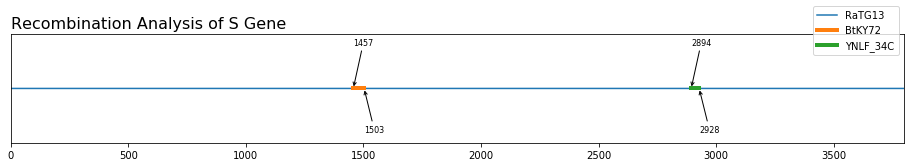

In [297]:
def draw_arrow(x, y):
    ax.annotate('%s' % str(x + offset), xy=(x+offset, 0), xytext=(x+offset, y), fontsize=8, 
            arrowprops=dict(arrowstyle='->', connectionstyle="arc3"))

offset = 0
fig, ax = plt.subplots(figsize=(16, 2))

ax.plot(np.array(a_s)+offset, np.zeros(len(a_s)), label='RaTG13')
ax.plot(np.array(b_s)+offset, np.zeros(len(b_s)), linewidth=4, label='BtKY72')
ax.plot(np.array(c_s)+offset, np.zeros(len(c_s)), linewidth=4,label='YNLF_34C')
# ax.plot(np.array(d_s)+offset, np.zeros(len(d_s)), label='BtRs_YN2013')
ax.set_xlim(offset, len(wins)+offset)
ax.set_ylim(-1, 1)
ax.yaxis.set_visible(False)
#ax.xaxis.set_visible(False)
#ax.set_axis_off()
ax.set_title('Recombination Analysis of S Gene', loc='left', fontsize=16)
plt.legend(bbox_to_anchor=(1, 1.3))

draw_arrow(1457, 0.8)
draw_arrow(1503, -0.8)
draw_arrow(2894, 0.8)
draw_arrow(2928, -0.8)

